In [1]:
import matplotlib.pyplot as plt
import numpy as np
from image_generation import generate_test_image, mycomputeColor, mycolorwheel
from conjugate_gradient import cg_main, OF_cg
from multigrid import multigrid_main, V_cycle
from preprocessing import calculate_image_derivatives, preprocess_image, get_rhs
from PCG import pcg_main, OF_pcg


## Generate test images

In [ ]:
n = 2**6
test_case_1 = generate_test_image(n, testcase=1)
test_case_2 = generate_test_image(n, testcase=2)

## Conjugate gradient

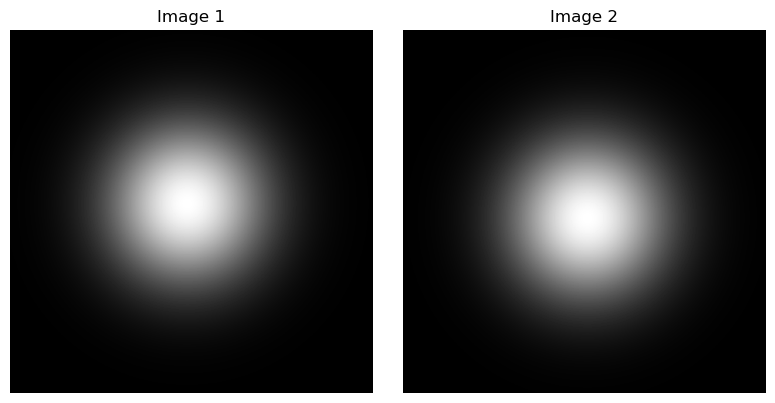

In [15]:

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(test_case_1[0], cmap='gray')
axes[0].set_title("Image 1")
axes[0].axis('off')

axes[1].imshow(test_case_1[1], cmap='gray')
axes[1].set_title("Image 2")
axes[1].axis('off')

plt.tight_layout()
plt.show()

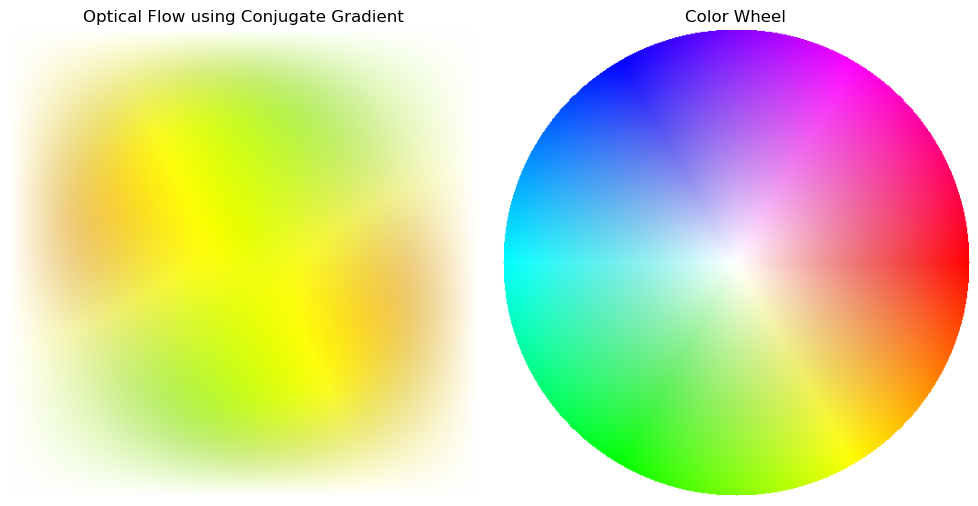

CG converged in 744 iterations with residual norm 1.19e+04


In [16]:

reg = 4**(8-4)

Ix, Iy, It = calculate_image_derivatives(test_case_1[0], test_case_1[1])
rhs_u, rhs_v = get_rhs(Ix, Iy, It)
u0 = np.zeros_like(rhs_u)
v0 = np.zeros_like(rhs_v)

u_cg, v_cg, residuals_cg, max_iter_cg = OF_cg(u0, v0, Ix, Iy, reg, rhs_u, rhs_v, tol=1e-8, maxit=2000)

of_img = mycomputeColor(u_cg, v_cg)
color_wheel = mycolorwheel(n)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left plot: optical flow image
axs[0].imshow(of_img)
axs[0].set_title("Optical Flow using Conjugate Gradient")
axs[0].axis('off')

# Right plot: color wheel
axs[1].imshow(color_wheel)
axs[1].set_title("Color Wheel")
axs[1].axis('off')

plt.tight_layout()
plt.show()

res_cg = residuals_cg[-1]
print(f"CG converged in {max_iter_cg} iterations with residual norm {res_cg:.2e}")

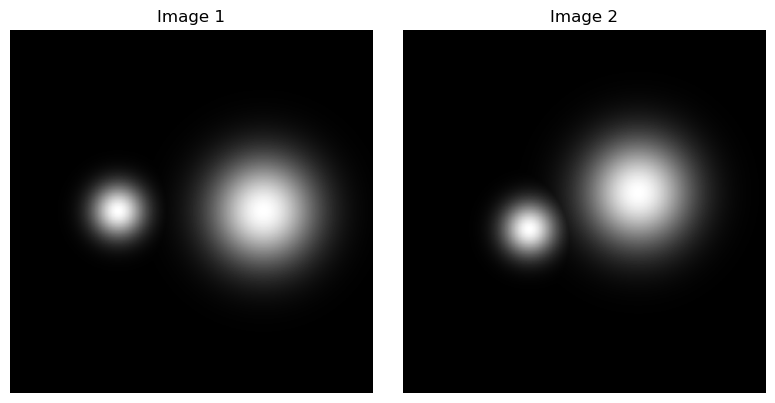

In [17]:
# Plotting below made by LLM
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(test_case_2[0], cmap='gray')
axes[0].set_title("Image 1")
axes[0].axis('off')

axes[1].imshow(test_case_2[1], cmap='gray')
axes[1].set_title("Image 2")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [3]:

reg = 4**(6-4)

Ix, Iy, It = calculate_image_derivatives(test_case_2[0], test_case_2[1])
rhs_u, rhs_v = get_rhs(Ix, Iy, It)
u0 = np.zeros_like(rhs_u)
v0 = np.zeros_like(rhs_v)

u_cg, v_cg, residuals_cg, max_iter_cg = OF_cg(u0, v0, Ix, Iy, reg, rhs_u, rhs_v, tol=1e-8, maxit=2000)

of_img = mycomputeColor(u_cg, v_cg)
color_wheel = mycolorwheel(n)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left plot: optical flow image
axs[0].imshow(of_img)
axs[0].set_title("Optical Flow using Conjugate Gradient")
axs[0].axis('off')

# Right plot: color wheel
axs[1].imshow(color_wheel)
axs[1].set_title("Color Wheel")
axs[1].axis('off')

plt.tight_layout()
plt.show()

res_cg = residuals_cg[-1]
print(f"CG converged in {max_iter_cg} iterations with residual norm {res_cg:.2e}")

NameError: name 'test_case_2' is not defined

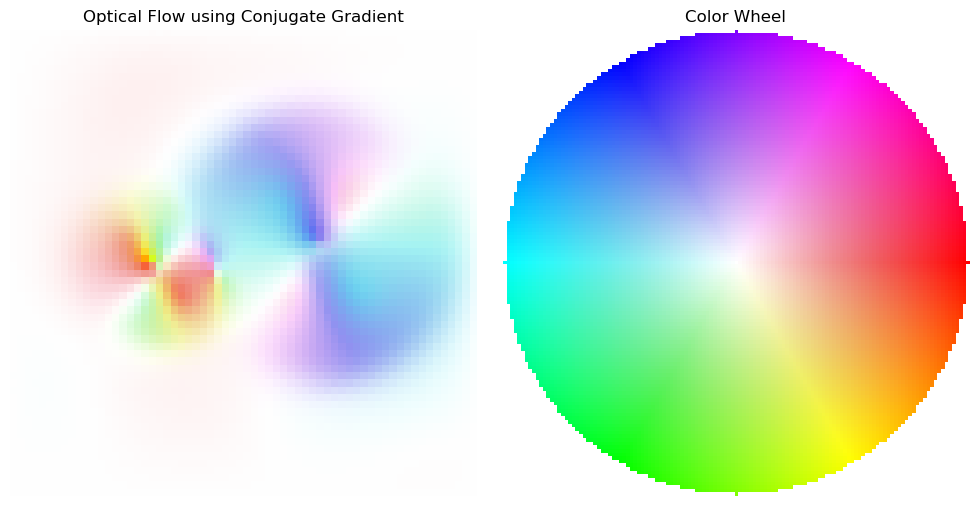

In [3]:
n = 2**6
test_case_2 = generate_test_image(n, testcase=2)
reg = 4**(6-4)

u, v = multigrid_main(test_case_2[0], test_case_2[1], reg, 3, 3, 3  )
of_img = mycomputeColor(u, v)
color_wheel = mycolorwheel(n)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left plot: optical flow image
axs[0].imshow(of_img)
axs[0].set_title("Optical Flow using Conjugate Gradient")
axs[0].axis('off')

# Right plot: color wheel
axs[1].imshow(color_wheel)
axs[1].set_title("Color Wheel")
axs[1].axis('off')

plt.tight_layout()
plt.show()


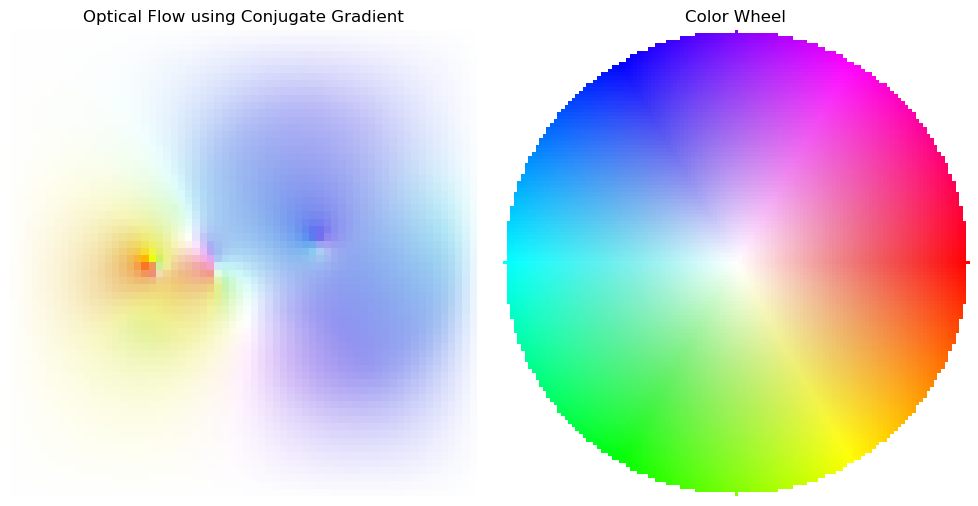

In [2]:
n = 2**6
test_case_2 = generate_test_image(n, testcase=2)
reg = 4**(6-4)

u, v, res, max_iter, elapsed_time = pcg_main(test_case_2[0], test_case_2[1], reg, 3, 3, 3  )
of_img = mycomputeColor(u, v)
color_wheel = mycolorwheel(n)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left plot: optical flow image
axs[0].imshow(of_img)
axs[0].set_title("Optical Flow using Conjugate Gradient")
axs[0].axis('off')

# Right plot: color wheel
axs[1].imshow(color_wheel)
axs[1].set_title("Color Wheel")
axs[1].axis('off')

plt.tight_layout()
plt.show()
